In [96]:
#https://github.com/arvin2911

In [104]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

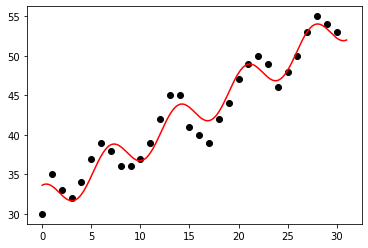

minimum error = 1.592725853040056
A = 2.1716818723637914
B = 0.9093249029166655
C = 0.7324784894461773
D = 31.45291849616531


In [97]:
#(i)

X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

def velfit(c, x, y):
    e2 = np.sqrt(1/(x.size)*np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2))
    return e2

v0 = np.array([3, 1*np.pi/4, 2/3, 32])   # 3 pi/4 2/3 32
res= opt.minimize(velfit, v0, args=(X, Y), method='Nelder-Mead')
c = res.x
x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*np.cos(c[1]*x2)+c[2]*x2+c[3])
plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.show()

error = velfit(c, X, Y)
print("minimum error =", error)
print("A =", c[0])
print("B =", c[1])
print("C =", c[2])
print("D =", c[3])


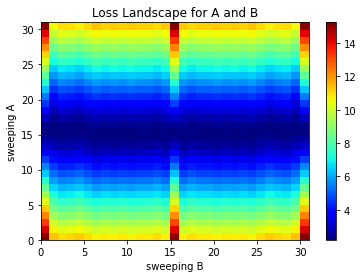

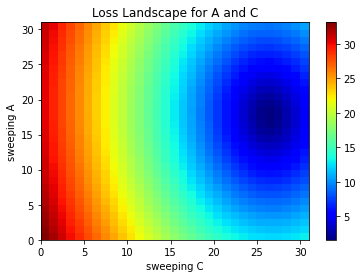

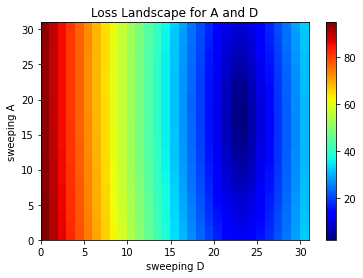

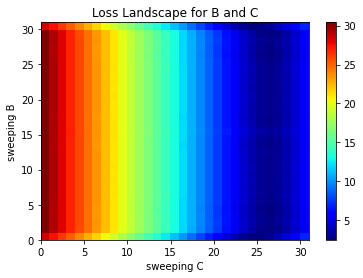

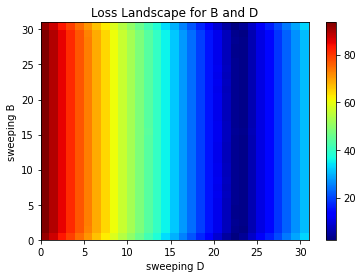

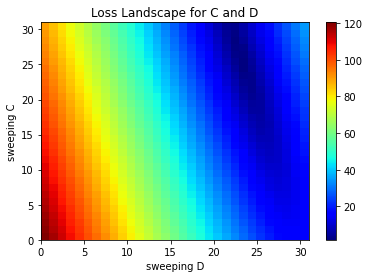

In [98]:
#(ii)
# create a range of values for the swept parameters
c0_vals = np.linspace(-15, 15, 31)
c1_vals = np.linspace(0, 2*np.pi, 31)
c2_vals = np.linspace(-1, 1, 31)
c3_vals = np.linspace(-62, 62, 31)

# initialize the loss array
lossesAB = np.zeros((c0_vals.size, c1_vals.size))

# fix C and D, sweep A and B, and calculate the loss
for i in range(c0_vals.size):
    for j in range(c1_vals.size):
        lossesAB[i, j] = velfit([c0_vals[i], c1_vals[j], c[2], c[3]], X, Y)

# plot the loss landscape using pcolor
plt.pcolor( lossesAB, cmap='jet')
plt.colorbar()
plt.xlabel('sweeping B')
plt.ylabel('sweeping A')
plt.title('Loss Landscape for A and B')
plt.show()

# initialize the loss array
lossesAC = np.zeros((c0_vals.size, c2_vals.size))

# fix B and D, sweep A and C, and calculate the loss
for i in range(c0_vals.size):
    for j in range(c2_vals.size):
        lossesAC[i, j] = velfit([c0_vals[i], c[1], c2_vals[j], c[3]], X, Y)

# plot the loss landscape using pcolor
plt.pcolor( lossesAC, cmap='jet')
plt.colorbar()
plt.xlabel('sweeping C')
plt.ylabel('sweeping A')
plt.title('Loss Landscape for A and C')
plt.show()

# initialize the loss array
lossesAD = np.zeros((c0_vals.size, c3_vals.size))

# fix B and C, sweep A and D, and calculate the loss
for i in range(c0_vals.size):
    for j in range(c3_vals.size):
        lossesAD[i, j] = velfit([c0_vals[i], c[1], c[2], c3_vals[j]], X, Y)

# plot the loss landscape using pcolor
plt.pcolor( lossesAD, cmap='jet')
plt.colorbar()
plt.xlabel('sweeping D')
plt.ylabel('sweeping A')
plt.title('Loss Landscape for A and D')
plt.show()

# initialize the loss array
lossesBC = np.zeros((c1_vals.size, c2_vals.size))

# fix A and D, sweep B and C, and calculate the loss
for i in range(c0_vals.size):
    for j in range(c3_vals.size):
        lossesAD[i, j] = velfit([c[0], c1_vals[i], c2_vals[j], c[3]], X, Y)

# plot the loss landscape using pcolor
plt.pcolor( lossesAD, cmap='jet')
plt.colorbar()
plt.xlabel('sweeping C')
plt.ylabel('sweeping B')
plt.title('Loss Landscape for B and C')
plt.show()

# initialize the loss array
lossesBD = np.zeros((c1_vals.size, c3_vals.size))

# fix A and C, sweep B and D, and calculate the loss
for i in range(c1_vals.size):
    for j in range(c3_vals.size):
        lossesBD[i, j] = velfit([c[0], c1_vals[i], c[2], c3_vals[j]], X, Y)

# plot the loss landscape using pcolor
plt.pcolor( lossesBD, cmap='jet')
plt.colorbar()
plt.xlabel('sweeping D')
plt.ylabel('sweeping B')
plt.title('Loss Landscape for B and D')
plt.show()

# initialize the loss array
lossesCD = np.zeros((c2_vals.size, c3_vals.size))

# fix B and D, sweep A and C, and calculate the loss
for i in range(c2_vals.size):
    for j in range(c3_vals.size):
        lossesBD[i, j] = velfit([c[0], c[1], c2_vals[i], c3_vals[j]], X, Y)

# plot the loss landscape using pcolor
plt.pcolor( lossesBD, cmap='jet')
plt.colorbar()
plt.xlabel('sweeping D')
plt.ylabel('sweeping C')
plt.title('Loss Landscape for C and D')
plt.show()


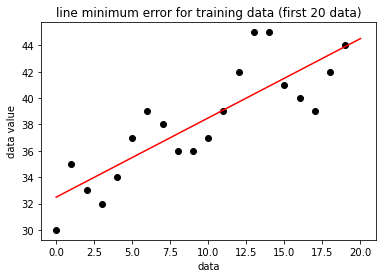

line minimum error for training data (first 20 data) = 2.2427493868481854


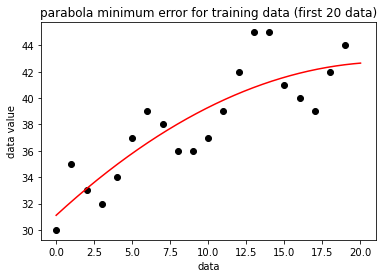

parabola minimum error for training data (first 20 data) = 2.1255393483505007


/Users/arvinn/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


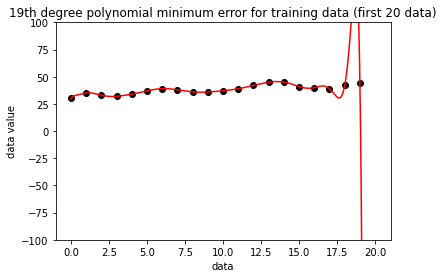

19th degree minimum polynomial error for training data (first 20 data) = 0.028351980546237686


In [99]:
y20data = Y[:20]
x20data = np.arange(0,20)

#line
def velfitline(c, x, y):
    e2 = np.sqrt(1/(x.size)*np.sum((c[0]*x+c[1]-y)**2))
    return e2

v0line = np.array([2/3, 32])
res20dataline= opt.minimize(velfitline, v0line, args=(x20data, y20data), method='Nelder-Mead')
c20dataline = res20dataline.x
x2_20dataline = np.arange(0, 20.01, 0.01)
yfit2_20data_line = (c20dataline[0]*x2_20dataline+c20dataline[1])

plt.plot(np.arange(0, 20), y20data, 'ko')
plt.plot(x2_20dataline, yfit2_20data_line, 'r-')
plt.title("line minimum error for training data (first 20 data)")
plt.xlabel("data")
plt.ylabel("data value")
plt.show()
print("line minimum error for training data (first 20 data) =" , velfitline(c20dataline, x20data, y20data))

#parabola
def velfitparabola(c, x, y):
    e2 = np.sqrt(1/(x.size)*np.sum((c[0]*(x**2)+c[1]*x+c[2]-y)**2))
    return e2

v0parabola = np.array([-1/100, 1/2, -32])
res20dataparabola= opt.minimize(velfitparabola, v0parabola, args=(x20data, y20data), method='Nelder-Mead')
c20dataparabola = res20dataparabola.x
x2_20dataparabola = np.arange(0, 20.01, 0.01)
yfit2_20data_parabola = (c20dataparabola[0]*(x2_20dataparabola**2) + c20dataparabola[1]*x2_20dataparabola + c20dataparabola[2])

plt.plot(np.arange(0, 20), y20data, 'ko')
plt.plot(x2_20dataparabola, yfit2_20data_parabola, 'r-')
plt.title("parabola minimum error for training data (first 20 data)")
plt.xlabel("data")
plt.ylabel("data value")
plt.show()
print("parabola minimum error for training data (first 20 data) =" , velfitparabola(c20dataparabola, x20data, y20data))

#19degree polynomial
def velfitpoly(c, x, y):
    e2 = np.sqrt(1/(x.size)*np.sum((np.polyval(c,x)-y)**2))
    return e2

v0poly = np.polyfit(x20data, y20data, 19)
x2_20datapoly = np.arange(0, 20.01, 0.01)
yfit2_20data_poly = np.polyval(v0poly, x2_20datapoly)
plt.plot(np.arange(0, 20), y20data, 'ko')
plt.plot(x2_20datapoly, yfit2_20data_poly, 'r-')
plt.ylim(-100, 100)
plt.title("19th degree polynomial minimum error for training data (first 20 data)")
plt.xlabel("data")
plt.ylabel("data value")
plt.show()
print("19th degree minimum polynomial error for training data (first 20 data) =" , velfitpoly(v0poly, x20data, y20data))

In [100]:
def velfitpoly(c, x, y):
    e2 = np.sqrt(1/(x.size)*np.sum((np.polyval(c,x)*x-y)**2))
    return e2


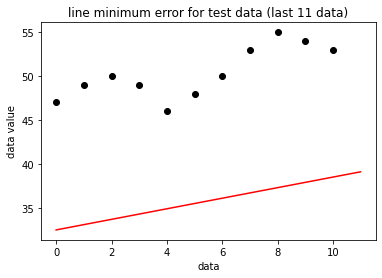

line error minimum for test data (last 11 data) = 14.979185421781299


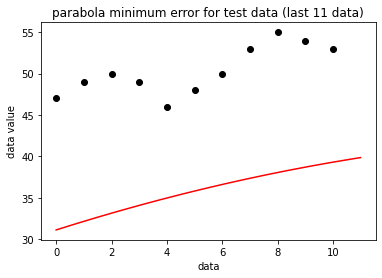

parabola error minimum for test data (last 11 data) = 14.918659032328


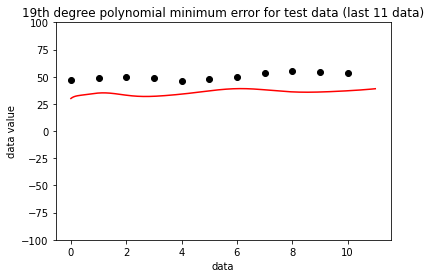

19th degree polynomial minimum error for test data (last 11 data) = 175.51127228413117


In [101]:
ytest = Y[20:]
xtest = np.arange(0,len(ytest))

#test data for fit line
x2_20testline = np.arange(0, 11.01, 0.01)
yfit2_20test_line = (c20dataline[0]*x2_20testline+c20dataline[1])

plt.plot(np.arange(0, 11), ytest, 'ko')
plt.plot(x2_20testline, yfit2_20test_line, 'r-')
plt.title("line minimum error for test data (last 11 data)")
plt.xlabel("data")
plt.ylabel("data value")
plt.show()
print("line error minimum for test data (last 11 data) =" , velfitline(c20dataline, xtest, ytest))

#test data for parabola
x2_20testparabola = np.arange(0, 11.01, 0.01)
yfit2_20test_parabola = (c20dataparabola[0]*(x2_20testparabola**2) + c20dataparabola[1]*x2_20testparabola + c20dataparabola[2])

plt.plot(np.arange(0, 11), ytest, 'ko')
plt.plot(x2_20testparabola, yfit2_20test_parabola, 'r-')
plt.title("parabola minimum error for test data (last 11 data)")
plt.xlabel("data")
plt.ylabel("data value")
plt.show()
print("parabola error minimum for test data (last 11 data) =" , velfitparabola(c20dataparabola, xtest, ytest))

#test data for 19 degree polynomial
x2_20testpoly = np.arange(0, 11.01, 0.01)
yfit2_20test_poly = np.polyval(v0poly, x2_20testpoly)
plt.plot(np.arange(0, 11), ytest, 'ko')
plt.plot(x2_20testpoly, yfit2_20test_poly, 'r-')
plt.title("19th degree polynomial minimum error for test data (last 11 data)")
plt.xlabel("data")
plt.ylabel("data value")
plt.ylim(-100, 100)
plt.show()
print("19th degree polynomial minimum error for test data (last 11 data) =" , velfitpoly(v0poly, xtest, ytest))


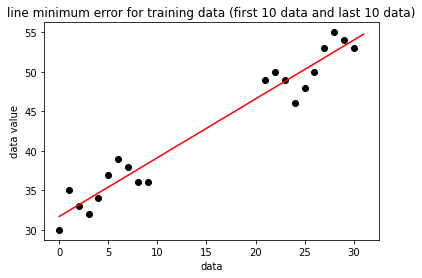

line error for training data (first 10 data and last 10 data) = 1.8516699045747265


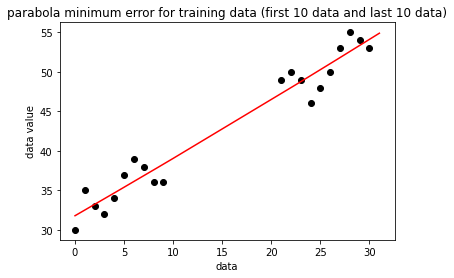

parabola error for training data (first 10 data and last 10 data) = 1.8508364127665178


/Users/arvinn/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


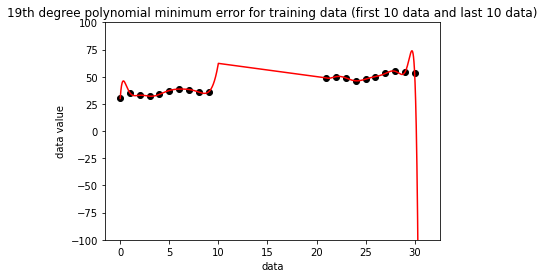

19th degree polynomial error for training data (first 10 data and last 10 data) = 901.7039470336822


In [102]:
#(iv)
y2 = np.concatenate((Y[:10],Y[21:]))
x2 = np.concatenate((np.arange(0,10), np.arange(21,31)))
#line
v0line2 = np.array([2/3, 32])
res20line2= opt.minimize(velfitline, v0line2, args=(x2, y2), method='Nelder-Mead')
c20line2 = res20line2.x
x2_20line2 = np.concatenate((np.arange(0,10.01, 0.01), np.arange(21,31.01, 0.01)))
yfit2_20_line2 = (c20line2[0]*x2_20line2+c20line2[1])

plt.plot(x2, y2, 'ko')
plt.plot(x2_20line2, yfit2_20_line2, 'r-')
plt.title("line minimum error for training data (first 10 data and last 10 data)")
plt.xlabel("data")
plt.ylabel("data value")
plt.show()
print("line error for training data (first 10 data and last 10 data) =" , velfitline(c20line2, x2, y2))

#parabola
v0parabola2 = np.array([-1/100, 1/2, -32])
res20parabola2= opt.minimize(velfitparabola, v0parabola2, args=(x2, y2), method='Nelder-Mead')
c20parabola2 = res20parabola2.x
x2_20parabola2 = np.concatenate((np.arange(0,10.01, 0.01), np.arange(21,31.01, 0.01)))
yfit2_20_parabola2 = (c20parabola2[0]*(x2_20parabola2**2) + c20parabola2[1]*x2_20parabola2 + c20parabola2[2])

plt.plot(x2, y2, 'ko')
plt.plot(x2_20parabola2, yfit2_20_parabola2, 'r-')
plt.title("parabola minimum error for training data (first 10 data and last 10 data)")
plt.xlabel("data")
plt.ylabel("data value")
plt.show()
print("parabola error for training data (first 10 data and last 10 data) =" , velfitparabola(c20parabola2, x2, y2))

v0poly2 = np.polyfit(x2, y2, 19)
x2_20datapoly2 = np.concatenate((np.arange(0,10.01, 0.01), np.arange(21,31.01, 0.01)))
yfit2_20data_poly2 = np.polyval(v0poly2, x2_20datapoly2)
plt.plot(x2, y2, 'ko')
plt.plot(x2_20datapoly2, yfit2_20data_poly2, 'r-')
plt.ylim(-100,100)
plt.title("19th degree polynomial minimum error for training data (first 10 data and last 10 data)")
plt.xlabel("data")
plt.ylabel("data value")
plt.show()
print("19th degree polynomial error for training data (first 10 data and last 10 data) =" , velfitpoly(v0poly2, x2, y2))


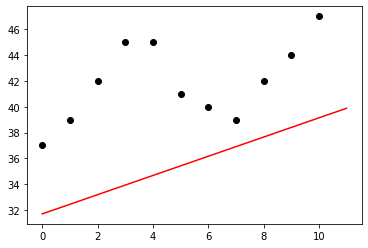

line error for test data (middle 11 data) = 2.5112967905716648


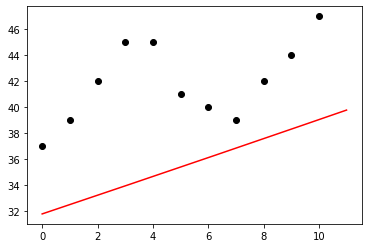

parabola error for test data (middle 11 data) = 2.5107693455788462


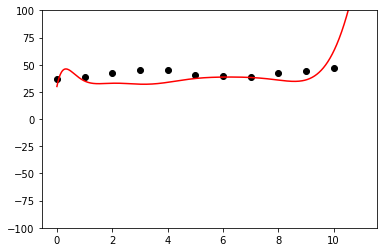

19th degree polynomial error for test data (middle 11 data) = 232.2173477123093


In [103]:
ytest2 = Y[10:21]
xtest2 = np.arange(0,len(ytest2))

#test data for fit line
x2_20testline2 = np.arange(0, 11.01, 0.01)
yfit2_20test_line2 = (c20line2[0]*x2_20testline2+c20line2[1])

plt.plot(np.arange(0, 11), ytest2, 'ko')
plt.plot(x2_20testline2, yfit2_20test_line2, 'r-')
plt.show()
print("line error for test data (middle 11 data) =" , velfitline(c20testline2, xtest2, ytest2))

#test data for parabola
x2_20testparabola2 = np.arange(0, 11.01, 0.01)
yfit2_20test_parabola2 = (c20parabola2[0]*(x2_20testparabola2**2) + c20parabola2[1]*x2_20testparabola2 + c20parabola2[2])

plt.plot(np.arange(0, 11), ytest2, 'ko')
plt.plot(x2_20testparabola2, yfit2_20test_parabola2, 'r-')
plt.show()
print("parabola error for test data (middle 11 data) =" , velfitparabola(c20testparabola2, xtest2, ytest2))

#test data for 19 degree polynomial
x2_20testpoly2 = np.arange(0, 11.01, 0.01)
yfit2_20test_poly2 = np.polyval(v0poly2, x2_20testpoly2)
plt.plot(np.arange(0, 11), ytest2, 'ko')
plt.plot(x2_20testpoly2, yfit2_20test_poly2, 'r-')
plt.ylim(-100,100)
plt.show()
print("19th degree polynomial error for test data (middle 11 data) =" , velfitpoly(v0poly2, xtest2, ytest2))
